<a href="https://colab.research.google.com/github/Yona1201/Brainomaly-DeepLearning-MRI-Classifier/blob/main/Alek_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Brainomaly: Sistem Klasifikasi Tumor Otak Menggunakan Deep Learning.**

**ID Tim: CC25-CF297**

Anggota Tim:
* (ML) MC325D5X0667 - Briliona - Universitas Tarumanagara
* (ML) MC325D5Y0676- Marchelino Benediktus Leintan - Universitas Tarumanagara
* (ML) MC325D5Y0711- Alek Piter Wardoyo - Universitas Tarumanagara
* (FEBE) FC325D5Y0721- Rafael Rashel Runtu - Universitas Tarumanagara
* (FEBE) FC325D5Y0728- Adriannus Justin Setiawan  - Universitas Tarumanagara
* (FEBE) FC325D5Y0762- Marcellino Frederick Wijaya  - Universitas Tarumanagara

## **Objective:**   
Penelitian ini bertujuan untuk merancang dan mengembangkan sebuah sistem berbasis web yang mampu melakukan klasifikasi jenis tumor otak melalui citra MRI dengan memanfaatkan metode Deep Learning, khususnya Convolutional Neural Network (CNN). Permasalahan utama yang ingin diatasi adalah keterbatasan akses terhadap alat bantu diagnosis yang akurat, efisien, dan mudah dioperasikan untuk mendukung deteksi dini tumor otak.

Untuk keperluan pelatihan model, tim menggabungkan gambar-gambar dari tiga sumber dataset berbeda, yaitu:

## **Sumber Dataset**
1. https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
2. https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
3. https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans

## Data Preparation

### Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alekpiterwardoyomc","key":"5b5000e81455de59bfdfcdd37285da41"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri
!kaggle datasets download -d rm1000/brain-tumor-mri-scans

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 85% 127M/149M [00:00<00:00, 1.33GB/s]
100% 149M/149M [00:00<00:00, 1.25GB/s]
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
100% 86.8M/86.8M [00:00<00:00, 906MB/s]
100% 86.8M/86.8M [00:00<00:00, 903MB/s]
Dataset URL: https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans
License(s): CC0-1.0
 78% 184M/236M [00:00<00:00, 647MB/s]
100% 236M/236M [00:00<00:00, 630MB/s]


In [ ]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

unzip_file("brain-tumor-mri-dataset.zip", "dataset1")
unzip_file("brain-tumor-classification-mri.zip", "dataset2")
unzip_file("brain-tumor-mri-scans.zip", "dataset3")

In [ ]:
import shutil
from pathlib import Path

combined_dir = Path("/content/drive/MyDrive/Capstone/Dataset")
combined_dir.mkdir(exist_ok=True)

def move_images(source_dir, label_name):
    label_dir = combined_dir / label_name
    label_dir.mkdir(exist_ok=True)
    for file in Path(source_dir).glob("*.*"):
        shutil.copy(file, label_dir / file.name)

move_images('dataset1/Testing/glioma', 'glioma')
move_images('dataset1/Testing/meningioma', 'meningioma')
move_images('dataset1/Testing/pituitary', 'pituitary')
move_images('dataset1/Testing/notumor', 'notumor')

move_images('dataset1/Training/glioma', 'glioma')
move_images('dataset1/Training/meningioma', 'meningioma')
move_images('dataset1/Training/pituitary', 'pituitary')
move_images('dataset1/Training/notumor', 'notumor')

move_images('dataset2/Testing/glioma_tumor', 'glioma')
move_images('dataset2/Testing/meningioma_tumor', 'meningioma')
move_images('dataset2/Testing/pituitary_tumor', 'pituitary')
move_images('dataset2/Testing/no_tumor_tumor', 'notumor')

move_images('dataset2/Training/glioma_tumor', 'glioma')
move_images('dataset2/Training/meningioma_tumor', 'meningioma')
move_images('dataset2/Training/pituitary_tumor', 'pituitary')
move_images('dataset2/Training/no_tumor', 'notumor')

move_images('dataset3/glioma', 'glioma')
move_images('dataset3/meningioma', 'meningioma')
move_images('dataset3/pituitary', 'pituitary')
move_images('dataset3/healthy', 'notumor')

print("✅ Datasets combined into 'combined_dataset/' folder.")


✅ Datasets combined into 'combined_dataset/' folder.


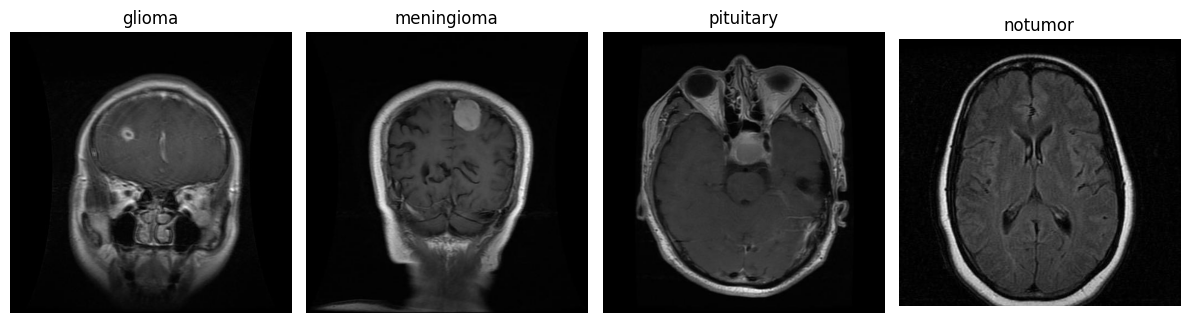

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Path ke folder gabungan
combined_dir = Path("/content/drive/MyDrive/Capstone/Dataset")

# Kelas
classes = ['glioma', 'meningioma', 'pituitary', 'notumor']

# Ukuran grid untuk tampilan
plt.figure(figsize=(12, 6))

for i, class_name in enumerate(classes):
    class_folder = combined_dir / class_name
    image_files = list(class_folder.glob("*.*"))

    # Ambil 1 gambar secara acak dari setiap kelas
    if image_files:
        img_path = random.choice(image_files)
        img = Image.open(img_path)

        # Tampilkan gambar
        plt.subplot(1, 4, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    else:
        print(f"Tidak ada gambar ditemukan di kelas: {class_name}")

plt.tight_layout()
plt.show()

Perbedaan utama terletak pada lokasi, bentuk, dan dampak visual tumor pada struktur otak:

* Glioma: dalam jaringan otak, bentuk menyebar.
* Meningioma: di permukaan otak, bentuk bulat jelas.
* Pituitary: di dasar otak, lebih kecil tapi dapat berdampak besar.
* No Tumor: otak tampak normal tanpa kelainan.

### Data Preprocessing

In [ ]:
import os
import shutil
from pathlib import Path
from PIL import Image
from sklearn.model_selection import train_test_split

# Settings
IMAGE_SIZE = (150, 150)
SEED = 42
split_ratios = [0.7, 0.15, 0.15]  # train, val, test

source_dir = Path("/content/drive/MyDrive/Capstone/Dataset")
output_dir = Path("/content/drive/MyDrive/Capstone/Final_Dataset")
output_dir.mkdir(exist_ok=True)

# Helper: Resize image and save
def resize_and_save(image_path, dest):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(IMAGE_SIZE)
    img.save(dest)

# Step 1: Loop over class folders
for class_dir in source_dir.iterdir():
    if class_dir.is_dir():
        all_images = list(class_dir.glob("*.*"))

        # Step 2: Split into train/val/test
        train_imgs, temp_imgs = train_test_split(all_images, train_size=split_ratios[0], random_state=SEED)
        val_imgs, test_imgs = train_test_split(temp_imgs, test_size=split_ratios[2] / (split_ratios[1] + split_ratios[2]), random_state=SEED)

        dataset_parts = {'train': train_imgs, 'val': val_imgs, 'test': test_imgs}

        # Step 3: Save to final folder
        for split_name, image_list in dataset_parts.items():
            target_class_dir = output_dir / split_name / class_dir.name
            target_class_dir.mkdir(parents=True, exist_ok=True)
            for img_path in image_list:
                target_path = target_class_dir / img_path.name
                resize_and_save(img_path, target_path)

print("✅ Dataset resized and split into train/val/test under 'final_dataset/'")


✅ Dataset resized and split into train/val/test under 'final_dataset/'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Settings
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
DATASET_PATH = '/content/drive/MyDrive/Capstone/Final_Dataset'

# Augment only training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Only rescale for val/test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load train, val, test
train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 12041 images belonging to 4 classes.
Found 2580 images belonging to 4 classes.
Found 2584 images belonging to 4 classes.


## Modelling

#CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model1 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    # Convolutional Block 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Convolutional Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Convolutional Block 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

callbacks = [early_stop, checkpoint, reduce_lr]

In [ ]:
history1 = model1.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.5151 - loss: 1.0990
Epoch 1: val_accuracy improved from -inf to 0.74186, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 143s 360ms/step - accuracy: 0.5153 - loss: 1.0985 - val_accuracy: 0.7419 - val_loss: 0.6988 - learning_rate: 0.0010
Epoch 2/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.7089 - loss: 0.7115
Epoch 2: val_accuracy improved from 0.74186 to 0.75853, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 116s 307ms/step - accuracy: 0.7090 - loss: 0.7115 - val_accuracy: 0.7585 - val_loss: 0.6486 - learning_rate: 0.0010
Epoch 3/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.7421 - loss: 0.6403
Epoch 3: val_accuracy improved from 0.75853 to 0.81047, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 141s 306ms/step - accuracy: 0.7421 - loss: 0.6403 - val_accuracy: 0.8105 - val_loss: 0.4910 - learning_rate: 0.0010
Epoch 4/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.7873 - loss: 0.5398
Epoch 4: val_accuracy improved from 0.81047 to 0.81434, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 114s 303ms/step - accuracy: 0.7873 - loss: 0.5398 - val_accuracy: 0.8143 - val_loss: 0.5005 - learning_rate: 0.0010
Epoch 5/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.8022 - loss: 0.5063
Epoch 5: val_accuracy improved from 0.81434 to 0.87287, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 116s 308ms/step - accuracy: 0.8022 - loss: 0.5063 - val_accuracy: 0.8729 - val_loss: 0.3386 - learning_rate: 0.0010
Epoch 6/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8227 - loss: 0.4795
Epoch 6: val_accuracy did not improve from 0.87287
377/377 ━━━━━━━━━━━━━━━━━━━━ 119s 315ms/step - accuracy: 0.8227 - loss: 0.4795 - val_accuracy: 0.8729 - val_loss: 0.3343 - learning_rate: 0.0010
Epoch 7/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.8359 - loss: 0.4247
Epoch 7: val_accuracy improved from 0.87287 to 0.88295, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 118s 314ms/step - accuracy: 0.8359 - loss: 0.4248 - val_accuracy: 0.8829 - val_loss: 0.2938 - learning_rate: 0.0010
Epoch 8/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.8453 - loss: 0.4184
Epoch 8: val_accuracy improved from 0.88295 to 0.88566, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 115s 306ms/step - accuracy: 0.8453 - loss: 0.4183 - val_accuracy: 0.8857 - val_loss: 0.2981 - learning_rate: 0.0010
Epoch 9/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.8552 - loss: 0.3795
Epoch 9: val_accuracy improved from 0.88566 to 0.89612, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 144s 311ms/step - accuracy: 0.8552 - loss: 0.3795 - val_accuracy: 0.8961 - val_loss: 0.2654 - learning_rate: 0.0010
Epoch 10/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8697 - loss: 0.3493
Epoch 10: val_accuracy improved from 0.89612 to 0.90233, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 120s 317ms/step - accuracy: 0.8697 - loss: 0.3493 - val_accuracy: 0.9023 - val_loss: 0.2713 - learning_rate: 0.0010
Epoch 11/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.8748 - loss: 0.3408
Epoch 11: val_accuracy did not improve from 0.90233
377/377 ━━━━━━━━━━━━━━━━━━━━ 117s 310ms/step - accuracy: 0.8748 - loss: 0.3408 - val_accuracy: 0.9012 - val_loss: 0.2492 - learning_rate: 0.0010
Epoch 12/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8819 - loss: 0.3117
Epoch 12: val_accuracy improved from 0.90233 to 0.91783, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 114s 302ms/step - accuracy: 0.8819 - loss: 0.3117 - val_accuracy: 0.9178 - val_loss: 0.2184 - learning_rate: 0.0010
Epoch 13/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8865 - loss: 0.2954
Epoch 13: val_accuracy improved from 0.91783 to 0.92984, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 114s 301ms/step - accuracy: 0.8865 - loss: 0.2954 - val_accuracy: 0.9298 - val_loss: 0.1980 - learning_rate: 0.0010
Epoch 14/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8931 - loss: 0.3011
Epoch 14: val_accuracy did not improve from 0.92984
377/377 ━━━━━━━━━━━━━━━━━━━━ 141s 298ms/step - accuracy: 0.8931 - loss: 0.3010 - val_accuracy: 0.9244 - val_loss: 0.2069 - learning_rate: 0.0010
Epoch 15/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.8965 - loss: 0.2828
Epoch 15: val_accuracy did not improve from 0.92984
377/377 ━━━━━━━━━━━━━━━━━━━━ 144s 305ms/step - accuracy: 0.8965 - loss: 0.2828 - val_accuracy: 0.9283 - val_loss: 0.1975 - learning_rate: 0.0010
Epoch 16/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8969 - loss: 0.2827
Epoch 16: val_accuracy improved from 0.92984 to 0.93566, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 114s 302ms/step - accuracy: 0.8969 - loss: 0.2826 - val_accuracy: 0.9357 - val_loss: 0.1887 - learning_rate: 0.0010
Epoch 17/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9073 - loss: 0.2528
Epoch 17: val_accuracy did not improve from 0.93566
377/377 ━━━━━━━━━━━━━━━━━━━━ 112s 297ms/step - accuracy: 0.9072 - loss: 0.2528 - val_accuracy: 0.9353 - val_loss: 0.1873 - learning_rate: 0.0010
Epoch 18/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.9068 - loss: 0.2553
Epoch 18: val_accuracy did not improve from 0.93566
377/377 ━━━━━━━━━━━━━━━━━━━━ 112s 298ms/step - accuracy: 0.9068 - loss: 0.2553 - val_accuracy: 0.9252 - val_loss: 0.1907 - learning_rate: 0.0010
Epoch 19/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9095 - loss: 0.2385
Epoch 19: val_accuracy did not improve from 0.93566
377/377 ━━━━━━━━━━━━━━━━━━━━ 115s 304ms/step - accuracy: 0.9095 - loss: 0.2385 - val_accuracy: 0.9279 - val_loss: 0.1825 - learning_rate: 0.00

377/377 ━━━━━━━━━━━━━━━━━━━━ 112s 296ms/step - accuracy: 0.9110 - loss: 0.2381 - val_accuracy: 0.9407 - val_loss: 0.1522 - learning_rate: 0.0010
Epoch 21/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9222 - loss: 0.2177
Epoch 21: val_accuracy improved from 0.94070 to 0.94496, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 114s 302ms/step - accuracy: 0.9222 - loss: 0.2177 - val_accuracy: 0.9450 - val_loss: 0.1655 - learning_rate: 0.0010
Epoch 22/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9235 - loss: 0.2221
Epoch 22: val_accuracy did not improve from 0.94496
377/377 ━━━━━━━━━━━━━━━━━━━━ 116s 308ms/step - accuracy: 0.9235 - loss: 0.2221 - val_accuracy: 0.9442 - val_loss: 0.1481 - learning_rate: 0.0010
Epoch 23/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9220 - loss: 0.2134
Epoch 23: val_accuracy improved from 0.94496 to 0.95814, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 138s 297ms/step - accuracy: 0.9220 - loss: 0.2134 - val_accuracy: 0.9581 - val_loss: 0.1173 - learning_rate: 0.0010
Epoch 24/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.9289 - loss: 0.2006
Epoch 24: val_accuracy did not improve from 0.95814
377/377 ━━━━━━━━━━━━━━━━━━━━ 115s 306ms/step - accuracy: 0.9289 - loss: 0.2006 - val_accuracy: 0.9519 - val_loss: 0.1244 - learning_rate: 0.0010
Epoch 25/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.9250 - loss: 0.1974
Epoch 25: val_accuracy did not improve from 0.95814

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
377/377 ━━━━━━━━━━━━━━━━━━━━ 112s 298ms/step - accuracy: 0.9250 - loss: 0.1974 - val_accuracy: 0.9578 - val_loss: 0.1249 - learning_rate: 0.0010
Epoch 26/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.9352 - loss: 0.1860
Epoch 26: val_accuracy improved from 0.95814 to 0.96434, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 114s 303ms/step - accuracy: 0.9352 - loss: 0.1860 - val_accuracy: 0.9643 - val_loss: 0.1127 - learning_rate: 5.0000e-04
Epoch 27/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9415 - loss: 0.1547
Epoch 27: val_accuracy improved from 0.96434 to 0.96628, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 112s 298ms/step - accuracy: 0.9416 - loss: 0.1547 - val_accuracy: 0.9663 - val_loss: 0.0984 - learning_rate: 5.0000e-04
Epoch 28/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9360 - loss: 0.1679
Epoch 28: val_accuracy improved from 0.96628 to 0.96705, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 111s 294ms/step - accuracy: 0.9360 - loss: 0.1679 - val_accuracy: 0.9671 - val_loss: 0.0928 - learning_rate: 5.0000e-04
Epoch 29/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.9424 - loss: 0.1625
Epoch 29: val_accuracy improved from 0.96705 to 0.96744, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 115s 304ms/step - accuracy: 0.9424 - loss: 0.1624 - val_accuracy: 0.9674 - val_loss: 0.0965 - learning_rate: 5.0000e-04
Epoch 30/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9427 - loss: 0.1540
Epoch 30: val_accuracy improved from 0.96744 to 0.97326, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 110s 290ms/step - accuracy: 0.9427 - loss: 0.1540 - val_accuracy: 0.9733 - val_loss: 0.0893 - learning_rate: 5.0000e-04
Epoch 31/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9482 - loss: 0.1397
Epoch 31: val_accuracy did not improve from 0.97326
377/377 ━━━━━━━━━━━━━━━━━━━━ 114s 301ms/step - accuracy: 0.9482 - loss: 0.1397 - val_accuracy: 0.9671 - val_loss: 0.0942 - learning_rate: 5.0000e-04
Epoch 32/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9484 - loss: 0.1455
Epoch 32: val_accuracy improved from 0.97326 to 0.97519, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 122s 325ms/step - accuracy: 0.9484 - loss: 0.1455 - val_accuracy: 0.9752 - val_loss: 0.0798 - learning_rate: 5.0000e-04
Epoch 33/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.9503 - loss: 0.1415
Epoch 33: val_accuracy did not improve from 0.97519
377/377 ━━━━━━━━━━━━━━━━━━━━ 114s 302ms/step - accuracy: 0.9503 - loss: 0.1415 - val_accuracy: 0.9705 - val_loss: 0.0880 - learning_rate: 5.0000e-04
Epoch 34/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9458 - loss: 0.1523
Epoch 34: val_accuracy did not improve from 0.97519

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
377/377 ━━━━━━━━━━━━━━━━━━━━ 112s 298ms/step - accuracy: 0.9458 - loss: 0.1522 - val_accuracy: 0.9678 - val_loss: 0.0914 - learning_rate: 5.0000e-04
Epoch 35/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9542 - loss: 0.1308
Epoch 35: val_accuracy improved from 0.97519 to 0.97674, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 110s 291ms/step - accuracy: 0.9542 - loss: 0.1308 - val_accuracy: 0.9767 - val_loss: 0.0759 - learning_rate: 2.5000e-04
Epoch 36/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.9583 - loss: 0.1182
Epoch 36: val_accuracy improved from 0.97674 to 0.97907, saving model to best_model.h5


377/377 ━━━━━━━━━━━━━━━━━━━━ 110s 292ms/step - accuracy: 0.9583 - loss: 0.1182 - val_accuracy: 0.9791 - val_loss: 0.0724 - learning_rate: 2.5000e-04
Epoch 37/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9573 - loss: 0.1173
Epoch 37: val_accuracy did not improve from 0.97907
377/377 ━━━━━━━━━━━━━━━━━━━━ 114s 301ms/step - accuracy: 0.9573 - loss: 0.1173 - val_accuracy: 0.9729 - val_loss: 0.0782 - learning_rate: 2.5000e-04
Epoch 38/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.9608 - loss: 0.1111
Epoch 38: val_accuracy did not improve from 0.97907
377/377 ━━━━━━━━━━━━━━━━━━━━ 110s 292ms/step - accuracy: 0.9608 - loss: 0.1111 - val_accuracy: 0.9783 - val_loss: 0.0657 - learning_rate: 2.5000e-04
Epoch 39/40
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9583 - loss: 0.1153
Epoch 39: val_accuracy did not improve from 0.97907
377/377 ━━━━━━━━━━━━━━━━━━━━ 112s 296ms/step - accuracy: 0.9583 - loss: 0.1153 - val_accuracy: 0.9771 - val_loss: 0.0671 - learnin

In [ ]:
test_loss, test_acc = model1.evaluate(test_generator)
print(f"🎯 Test Accuracy: {test_acc * 100:.2f}%")

81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.9600 - loss: 0.1015
🎯 Test Accuracy: 97.41%


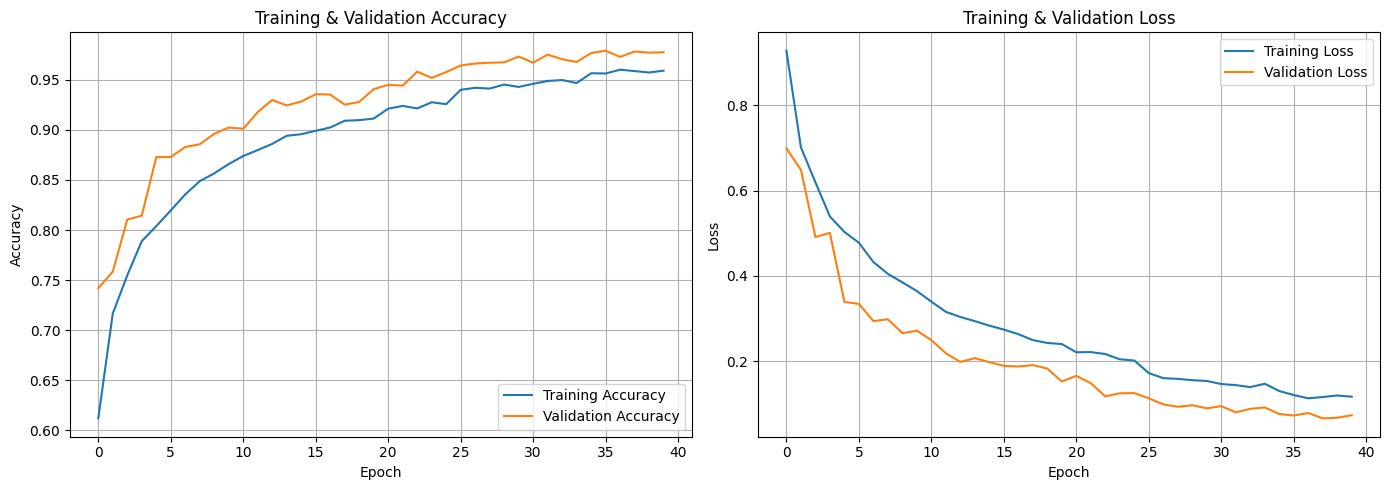

In [ ]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()